[model-segmentation-with-cubist](https://www.r-bloggers.com/model-segmentation-with-cubist/)

In [29]:
library(tidyverse)
library(Matrix)
library(data.table)
setwd("D:/Projects/BrutalAge/data/")
train <- read_csv("tap_fun_train.csv")
#train$cls <- as.factor(ifelse(train$pay_price==train$prediction_pay_price,'same','diff'))
#train$cls <- as.factor(ifelse(train$pay_price==0,'free','paid'))

Parsed with column specification:
cols(
  .default = col_integer(),
  register_time = col_datetime(format = ""),
  wood_add_value = col_double(),
  wood_reduce_value = col_double(),
  stone_add_value = col_double(),
  stone_reduce_value = col_double(),
  ivory_add_value = col_double(),
  ivory_reduce_value = col_double(),
  meat_add_value = col_double(),
  meat_reduce_value = col_double(),
  magic_add_value = col_double(),
  magic_reduce_value = col_double(),
  avg_online_minutes = col_double(),
  pay_price = col_double(),
  prediction_pay_price = col_double()
)
See spec(...) for full column specifications.


In [30]:
df<- train[,c(109,106:108)]
df$wood <- train$wood_add_value + train$wood_reduce_value
df$stone <- train$stone_add_value + train$stone_reduce_value
df$ivory <- train$ivory_add_value + train$ivory_reduce_value
df$meat <- train$meat_add_value + train$meat_reduce_value
df$magic <- train$magic_add_value + train$magic_reduce_value
df$infantry <- train$infantry_add_value + train$infantry_reduce_value + train$wound_infantry_add_value + train$wound_infantry_reduce_value
df$cavalry <- train$cavalry_add_value + train$cavalry_reduce_value + train$wound_cavalry_add_value + train$wound_cavalry_reduce_value
df$shaman <- train$shaman_add_value + train$shaman_reduce_value + train$wound_shaman_add_value + train$wound_shaman_reduce_value
#acc
df$gen_acc <- train$general_acceleration_add_value + train$general_acceleration_reduce_value
df$bld_acc <- train$building_acceleration_add_value + train$building_acceleration_reduce_value
df$rsh_acc <- train$reaserch_acceleration_add_value + train$reaserch_acceleration_reduce_value
df$train_acc <- train$training_acceleration_add_value + train$training_acceleration_reduce_value
df$treat_acc <- train$treatment_acceleraion_add_value + train$treatment_acceleration_reduce_value
#level
# df$bdlevel <- apply(train[,35:50],1,sum)
# df$sclevel <- apply(train[,51:99],1,sum)
#atk
df$pvp <- train$pvp_battle_count
df$pve <- train$pve_battle_count

In [5]:
ls()
# rm(list="train")

[1] "df"    "train"

In [31]:
library(caret)
trn_id <- createDataPartition(df$prediction_pay_price,p=0.7,list=F)
trn <- df[trn_id,]
vld <- df[-trn_id,]

In [33]:
colnames(trn)[findCorrelation(cor(trn))]
#removing high-correlation predictors
cor_id <- findCorrelation(cor(trn))
trn <- trn[,-cor_id]
vld <- vld[,-cor_id]

[1] "wood"    "meat"    "gen_acc" "stone"

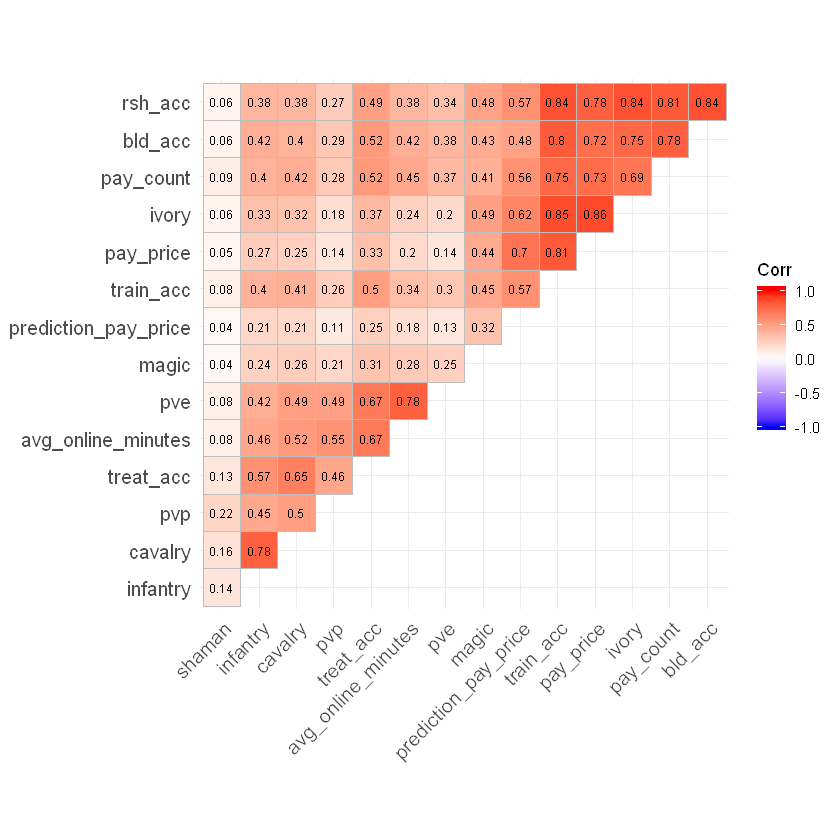

In [37]:
library(ggcorrplot)
ggcorrplot(round(cor(trn),2), hc.order = TRUE, type = "upper", lab = TRUE,lab_size = 2.5)

In [39]:
trn <- data.frame(trn)
trnX <- trn[,2:15]
trnY <- trn$prediction_pay_price

vld <- data.frame(vld)
vldX <- vld[,2:15]
vldY <- vld$prediction_pay_price

- Linear Regression
    - LR
    - PLS
    - Ridge/Lasso
    
- Nonlinear Regression
    - Neural Networks
    - MARS
    - SVM
    - KNN

- Regression Trees
    - CART
    - RF
    - GBM
    - Cubist
    - Ensemble

In [48]:
library(caret)
set.seed(821)
ctrl <- trainControl(method = "cv",number=5)

In [45]:
#Linear Regression
set.seed(821)
fit_lm <- train(trnX,trnY,method = "lm",trControl=ctrl)
result_lm <- fit_lm$results
pred_lm <- predict(fit_lm,newdata = vldX)
RMSE(pred = pred_lm,obs = vldY)

[1] 58.12688

In [ ]:
#PLS
set.seed(821)
fit_pls <- train(trnX,trnY,methon="pls",tuneLength=20,trControl=ctrl)
result_pls <- fit_pls$results
pred_pls <- predict(fit_pls,newdata = vldX)
RMSE(pred = pred_pls,obs = vldY)

In [53]:
#lasso
set.seed(821)
fit_lasso <- train(trnX,trnY,methon="lasso",tuneLength=10,trControl=ctrl)
result_lasso <- fit_lasso$results
pred_lasso <- predict(fit_lasso,newdata = vldX)
RMSE(pred = pred_lasso,obs = vldY)

[1] "cor_id"    "ctrl"      "pred_lm"   "result_lm" "trn_id"    "trnX"     
[7] "trnY"      "vldX"      "vldY"

In [21]:
#CART
set.seed(821)
fit_cart <- train(trnX,trnY,method = "rpart2",tuneLength=10,trControl=ctrl)

In [23]:
results_cart <- fit_cart$results
tune_cart <- fit_cart$bestTune
pred_cart <- 

maxdepth,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
1,74.42142,0.2532961,2.901984,14.09076,0.05423433,0.2059845
2,67.70050,0.3808873,2.433663,13.84773,0.06026466,0.2078638
3,66.39776,0.4130573,2.302499,15.50021,0.07443412,0.1824580
4,66.44086,0.4208849,2.181037,16.21216,0.07946782,0.1717599
5,65.63297,0.4421717,2.161266,16.35988,0.07436567,0.1597150
6,65.90391,0.4412617,2.086915,16.21200,0.07844006,0.1445043
7,65.48797,0.4495153,1.926703,16.55203,0.08253218,0.1484981
8,65.48797,0.4495153,1.926703,16.55203,0.08253218,0.1484981
10,65.48797,0.4495153,1.926703,16.55203,0.08253218,0.1484981
11,65.48797,0.4495153,1.926703,16.55203,0.08253218,0.1484981


```r
#RF
set.seed(821)
fit_rf <- train(trn[,2:9],trn$prediction_pay_price,method = "rf",tuneLength=10,trControl=ctrl,importance=T)
```
`cannot allocate vector of size 6.8 Gb,will try h2o later`


In [ ]:
grid_gbm <- expand.grid(interaction.depth=seq(1,7,by=2),
                    n.trees=seq(100,1000,by=50),
                       shrinkage=c(0.01,0.1),
                       n.minobsinnode=c(0,1))
set.seed(529)
fit_gbm <- train(trnX,trnY,method="gbm",verbose=F,
                tuneGrid=grid_gbm,trControl=ctrl)
plot(fit_gbm)

In [ ]:
grid_cubist <- expand.grid(committees=c(1:10,20,50,75,100),
                       neighbors=c(0,1,5,9))
set.seed(529)
fit_cubist <- train(trnX,trnY,method="cubist",verbose=F,
                   tuneGrid=grid_cubist,trControl=ctrl)
plot(fit_cubist)

In [ ]:
#mars
grid_mars <- expand.grid(.degree=1:2,.nprune=2:38)
set.seed(100)
fit_mars <- train(solTrainXtrans,solTrainY,
                 method="earth",tuneGrid=grid_mars,trControl=trainControl(method="cv"))
fit_mars

In [ ]:
#SVM
library(kernlab)
fit_svm <- ksvm(x = as.matrix(solTrainXtrans), y = solTrainY, kernel ="rbfdot", 
                kpar="automatic",C = 1, epsilon = 0.1)
fit_svm